In [54]:
import pandas as pd
import matplotlib.pyplot as plt
#using Muneeza's code
# read data as dataframe
data = pd.read_csv('allmn.csv')

# removes samples that contain NANs from a subset of the data 
def drop_nan(col_names, data):
    # data    : original dataframe
    # col_ids : column ids for the clean(no-nan) sub_dataset
    sub_data = data[col_names].dropna()
    return(sub_data)
    
# get sub_data and find correlation
sub = drop_nan(data.columns,data)
sub_corr = sub.corr()

/Users/rachelroca/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
sub

,sentyear,district,county,dcnum,count,sentord,order,sex,race,Agecat,...,reason3,reason4,preason1,preason2,preason3,region,presumptlife,presumptlifeid,lifeminmonths,DispType
0,2019,5,42,CR18945,1.0,1.0,1.0,1,2,3,...,0,0,0.0,0.0,0.0,4,0,0,0,3
1,2019,10,2,CR185398,1.0,1.0,1.0,1,2,5,...,0,0,0.0,0.0,0.0,3,0,0,0,2
2,2019,10,2,CR192286,1.0,1.0,1.0,1,1,3,...,0,0,442.0,470.0,0.0,3,0,0,0,4
3,2019,7,3,CR181303,1.0,1.0,1.0,1,1,5,...,0,0,0.0,0.0,0.0,4,0,0,0,3
4,2019,9,4,CR192555,1.0,1.0,1.0,1,1,5,...,0,0,0.0,0.0,0.0,4,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87592,2015,10,58,CR1397,2.0,1.0,1.0,1,2,5,...,0,0,0.0,0.0,0.0,4,0,0,0,1
87593,2015,2,62,CR151835,1.0,1.0,1.0,1,1,7,...,0,0,440.0,0.0,0.0,2,0,0,0,1
87594,2015,6,69,DUCR13431,1.0,1.0,1.0,1,2,5,...,0,0,470.0,442.0,0.0,4,0,0,0,1
87595,2015,6,69,DUCR143177,1.0,1.0,1.0,2,1,6,...,0,0,0.0,0.0,0.0,4,0,0,0,1


In [56]:
plea_guilty=sub[sub["plea"]==1]
plea_guilty

,sentyear,district,county,dcnum,count,sentord,order,sex,race,Agecat,...,reason3,reason4,preason1,preason2,preason3,region,presumptlife,presumptlifeid,lifeminmonths,DispType
0,2019,5,42,CR18945,1.0,1.0,1.0,1,2,3,...,0,0,0.0,0.0,0.0,4,0,0,0,3
1,2019,10,2,CR185398,1.0,1.0,1.0,1,2,5,...,0,0,0.0,0.0,0.0,3,0,0,0,2
2,2019,10,2,CR192286,1.0,1.0,1.0,1,1,3,...,0,0,442.0,470.0,0.0,3,0,0,0,4
3,2019,7,3,CR181303,1.0,1.0,1.0,1,1,5,...,0,0,0.0,0.0,0.0,4,0,0,0,3
4,2019,9,4,CR192555,1.0,1.0,1.0,1,1,5,...,0,0,0.0,0.0,0.0,4,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87591,2015,3,55,CR146345,2.0,1.0,1.0,1,4,4,...,0,0,0.0,0.0,0.0,4,0,0,0,1
87593,2015,2,62,CR151835,1.0,1.0,1.0,1,1,7,...,0,0,440.0,0.0,0.0,2,0,0,0,1
87594,2015,6,69,DUCR13431,1.0,1.0,1.0,1,2,5,...,0,0,470.0,442.0,0.0,4,0,0,0,1
87595,2015,6,69,DUCR143177,1.0,1.0,1.0,2,1,6,...,0,0,0.0,0.0,0.0,4,0,0,0,1


In [57]:
plea_nguilty = sub[sub["plea"]==2]
plea_nguilty

,sentyear,district,county,dcnum,count,sentord,order,sex,race,Agecat,...,reason3,reason4,preason1,preason2,preason3,region,presumptlife,presumptlifeid,lifeminmonths,DispType
127,2019,10,2,CR175995,1.0,1.0,1.0,1,2,6,...,0,0,0.0,0.0,0.0,3,0,0,0,2
365,2019,10,82,CR19600,1.0,1.0,1.0,1,2,6,...,0,0,0.0,0.0,0.0,3,0,0,0,2
472,2019,10,13,CR181089,1.0,1.0,1.0,1,3,4,...,0,0,0.0,0.0,0.0,4,0,0,0,1
513,2019,2,62,CR191295,1.0,1.0,1.0,1,4,4,...,0,0,0.0,0.0,0.0,2,0,0,0,2
534,2019,1,10,CR19640,1.0,1.0,1.0,1,1,5,...,0,0,0.0,0.0,0.0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87542,2015,3,55,CR141683,3.0,1.0,1.0,1,1,3,...,0,0,0.0,0.0,0.0,4,0,0,0,1
87577,2015,7,73,CR137421,1.0,1.0,1.0,2,2,5,...,0,0,0.0,0.0,0.0,4,0,0,0,1
87589,2015,5,42,CR15457,1.0,1.0,1.0,2,1,5,...,0,0,0.0,0.0,0.0,4,0,0,0,1
87590,2015,3,55,CR143840,1.0,1.0,1.0,1,2,5,...,0,0,0.0,0.0,0.0,4,0,0,0,1


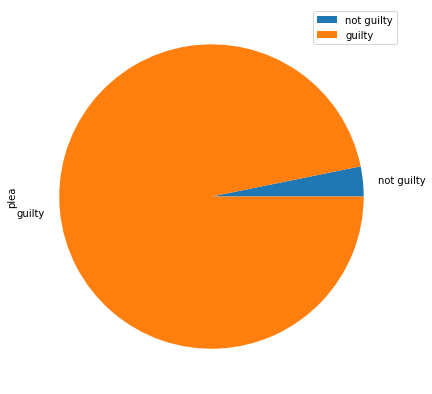

In [58]:
df = pd.DataFrame({'plea':[len(plea_nguilty), len(plea_guilty)]}, index=["not guilty", "guilty"])
plot = df.plot.pie(y='plea', figsize=(7, 7))
plt.savefig("plea_guilty_vs_not_guilty.png")

In [39]:
pg_1=plea_guilty[plea_guilty["race"]==1]
pg_2=plea_guilty[plea_guilty["race"]==2]
pg_3=plea_guilty[plea_guilty["race"]==3]
pg_4=plea_guilty[plea_guilty["race"]==4]
pg_5=plea_guilty[plea_guilty["race"]==5]
pg_6=plea_guilty[plea_guilty["race"]==6]

png_1=plea_nguilty[plea_nguilty["race"]==1]
png_2=plea_nguilty[plea_nguilty["race"]==2]
png_3=plea_nguilty[plea_nguilty["race"]==3]
png_4=plea_nguilty[plea_nguilty["race"]==4]
png_5=plea_nguilty[plea_nguilty["race"]==5]
png_6=plea_nguilty[plea_nguilty["race"]==6]


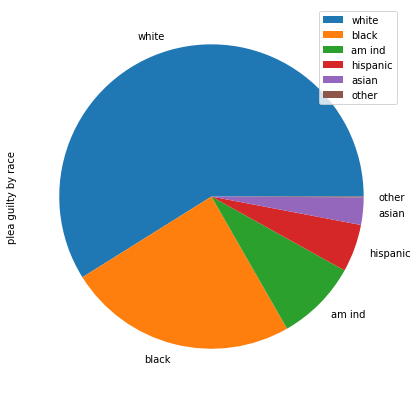

In [59]:
df = pd.DataFrame({'plea guilty by race':[len(pg_1),len(pg_2), len(pg_3), len(pg_4), len(pg_5), len(pg_6)]}, index=["white", "black", "am ind", "hispanic", "asian", "other"])
plot = df.plot.pie(y='plea guilty by race', figsize=(7, 7))
plt.savefig('plea_guilty_by_race.png')

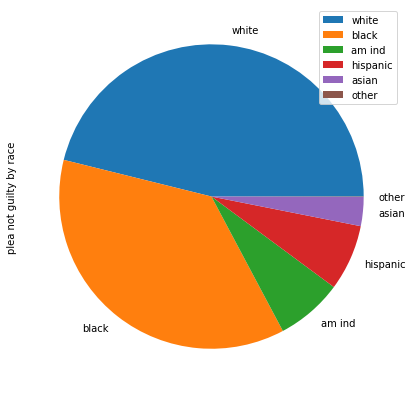

In [60]:
df = pd.DataFrame({'plea not guilty by race':[len(png_1),len(png_2), len(png_3), len(png_4), len(png_5), len(png_6)]}, index=["white", "black", "am ind", "hispanic", "asian", "other"])
plot = df.plot.pie(y='plea not guilty by race', figsize=(7, 7))
plt.savefig('plea_not_guilty_by_race.png')